In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import Adam
import pandas as pd

ModuleNotFoundError: No module named 'keras'

In [ ]:
data=pd.read_csv('/content/auto-mpg.data',sep='\s+',header=None)
data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:

data.isnull().sum()

,0
Mpg,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Modelyear,0
Origin,0
Carname,0


In [ ]:
data.columns=['Mpg','Cylinders','Displacement','Horsepower','Weight','Acceleration','Modelyear','Origin','Carname']
data

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Modelyear,Origin,Carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
data.isnull().sum()

,0
Mpg,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Modelyear,0
Origin,0
Carname,0


In [ ]:
data.dtypes

,0
Mpg,float64
Cylinders,int64
Displacement,float64
Horsepower,object
Weight,float64
Acceleration,float64
Modelyear,int64
Origin,int64
Carname,object


In [ ]:
data['Horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
for value in['Horsepower','Carname']:
    print(value,":",sum(data[value]=='?'))

Horsepower : 6
Carname : 0


In [ ]:
data1=data.describe(include='all')
data1

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Modelyear,Origin,Carname
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [ ]:
for value in ['Horsepower']:
    data.replace(['?'],data1[value][2],inplace=True)

/tmp/ipython-input-119-1307606501.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.replace(['?'],data1[value][2],inplace=True)


In [ ]:
data['Horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

<Axes: xlabel='Horsepower', ylabel='count'>

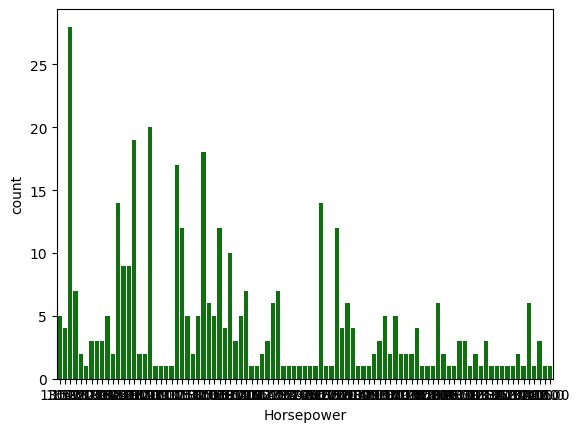

In [ ]:
sns.countplot(x=data.Horsepower,color='g')

In [ ]:
data1=data.drop(['Carname'],axis=1)
data1

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Modelyear,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1.Horsepower=le.fit_transform(data1.Horsepower)
le1=LabelEncoder()

In [ ]:
data2=data1.corr()

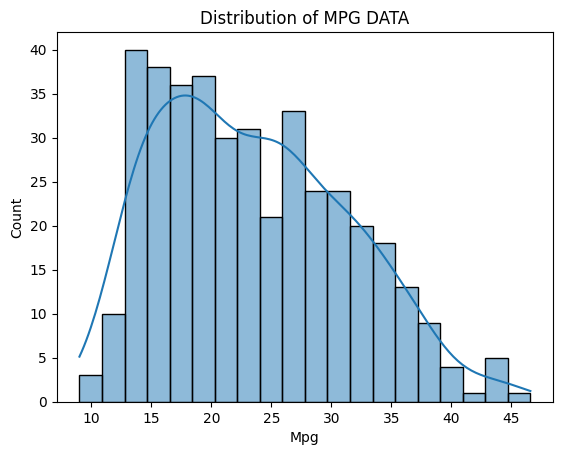

In [ ]:
sns.histplot(data['Mpg'],kde=True,bins=20)
plt.title('Distribution of MPG DATA')
plt.show()

<Axes: >

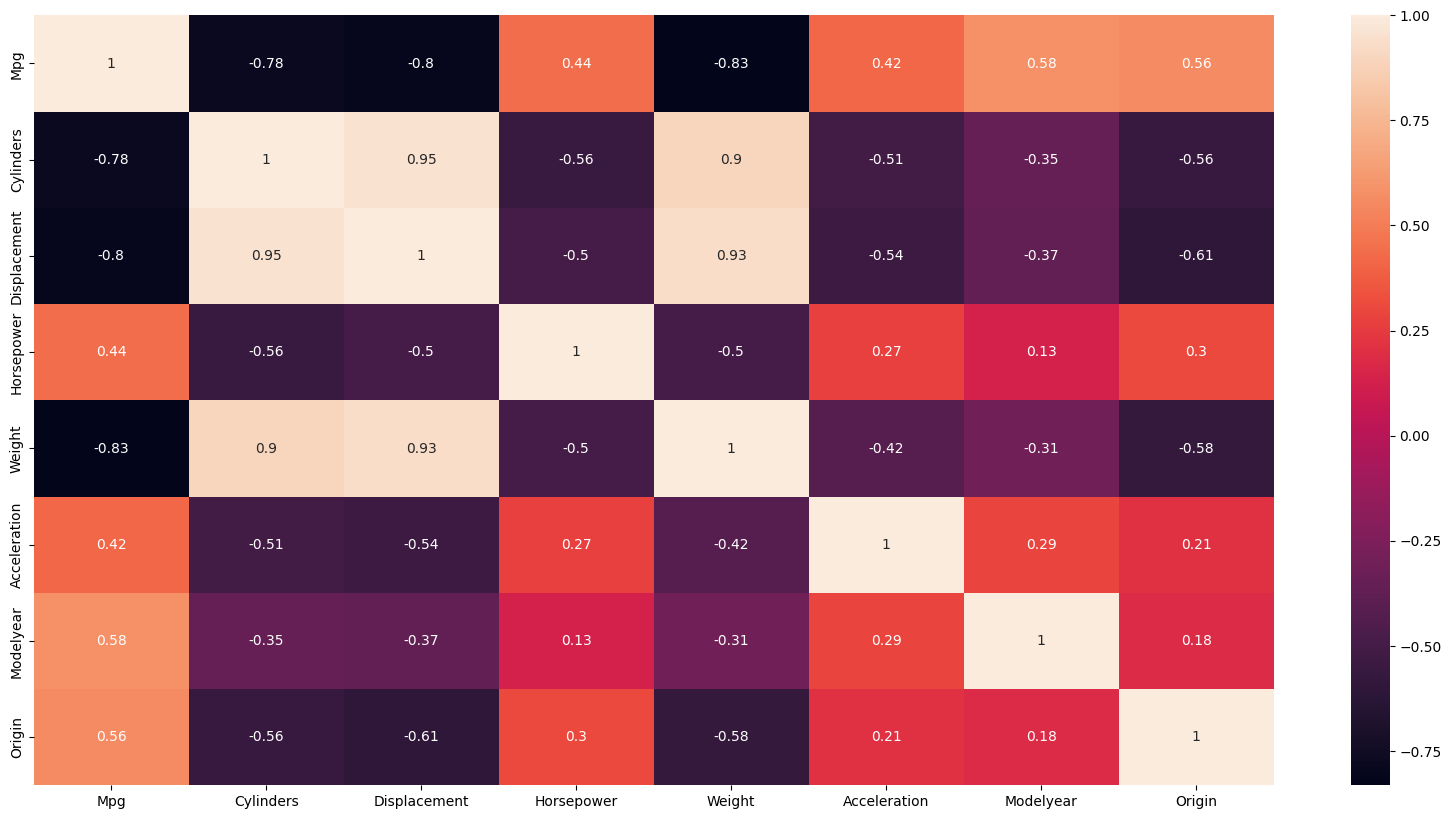

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data2,annot=True)

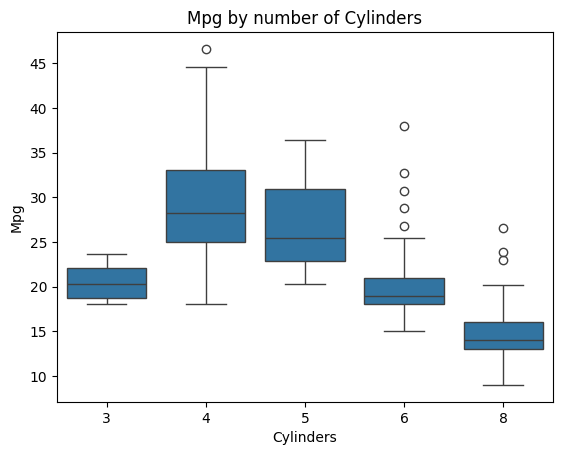

In [ ]:
sns.boxplot(x='Cylinders',y='Mpg',data=data1)
plt.title('Mpg by number of Cylinders')
plt.show()

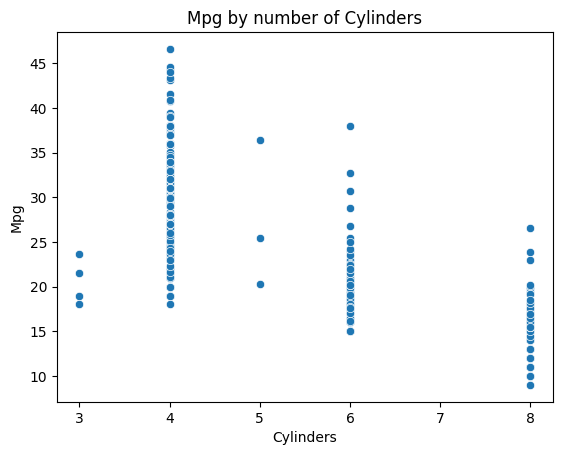

In [ ]:
sns.scatterplot(x='Cylinders',y='Mpg',data=data1)
plt.title('Mpg by number of Cylinders')
plt.show()

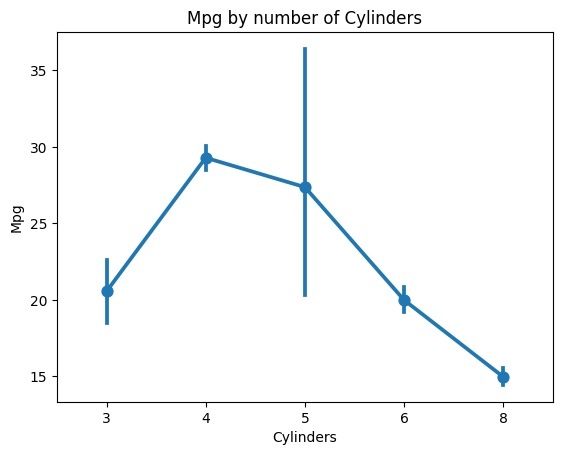

In [ ]:
sns.pointplot(x='Cylinders',y='Mpg',data=data1)
plt.title('Mpg by number of Cylinders')
plt.show()

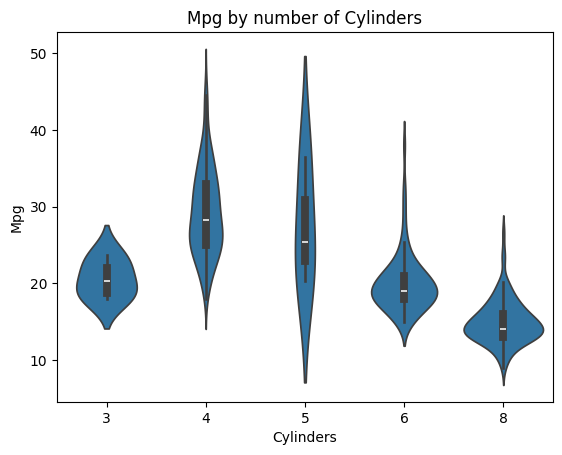

In [ ]:
sns.violinplot(x='Cylinders',y='Mpg',data=data1)
plt.title('Mpg by number of Cylinders')
plt.show()

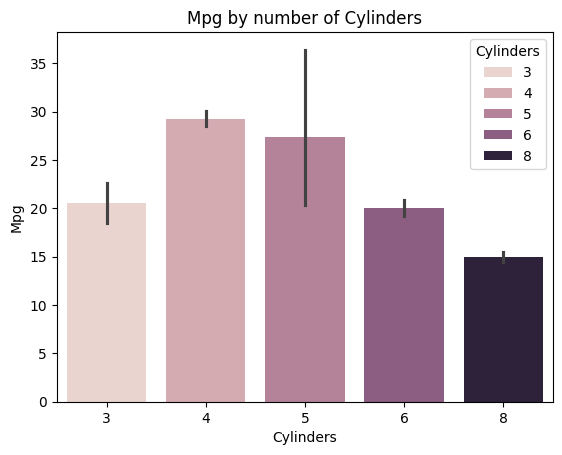

In [ ]:
sns.barplot(x='Cylinders',y='Mpg',data=data1,hue=data1.Cylinders)
plt.title('Mpg by number of Cylinders')
plt.show()

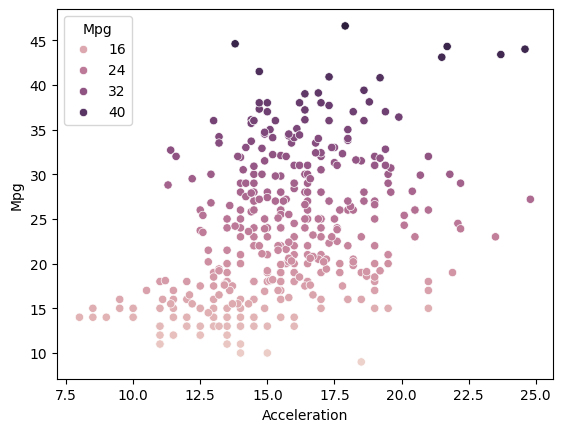

In [ ]:
sns.scatterplot(x=data1.Acceleration,y=data1.Mpg,hue=data1.Mpg)
plt.show()

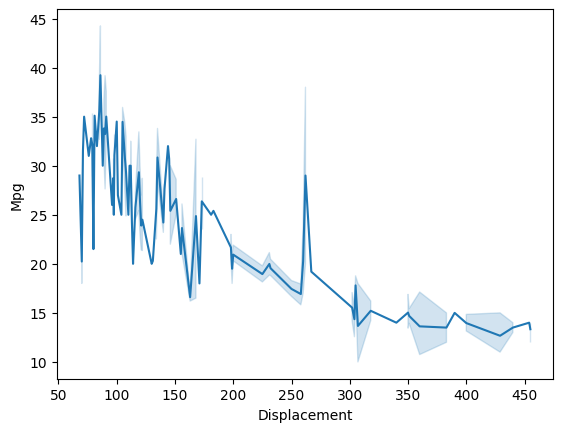

In [ ]:
sns.lineplot(x=data1.Displacement,y=data1.Mpg,data=data1)
plt.show()

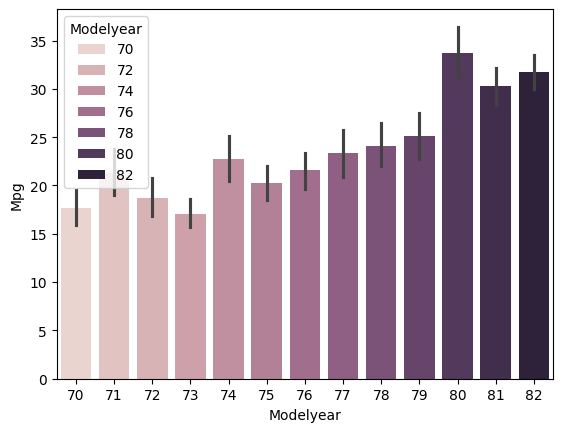

In [ ]:
sns.barplot(x='Modelyear',y='Mpg',hue=data1.Modelyear,data=data1)
plt.show()

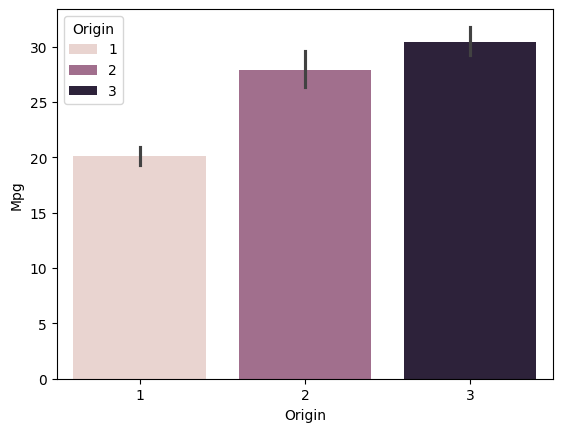

In [ ]:
sns.barplot(x='Origin',y='Mpg',hue=data1.Origin,data=data1)
plt.show()

In [ ]:
#i/o creation
ip=data1.drop(['Mpg'],axis=1)
ip

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Modelyear,Origin
0,8,307.0,15,3504.0,12.0,70,1
1,8,350.0,33,3693.0,11.5,70,1
2,8,318.0,27,3436.0,11.0,70,1
3,8,304.0,27,3433.0,12.0,70,1
4,8,302.0,22,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,80,2790.0,15.6,82,1
394,4,97.0,51,2130.0,24.6,82,2
395,4,135.0,78,2295.0,11.6,82,1
396,4,120.0,73,2625.0,18.6,82,1


In [ ]:
op=data['Mpg']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)

In [ ]:
data1.shape

(398, 8)

In [ ]:
x_train.shape

(318, 7)

In [ ]:
#Standard scalar transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
x_train

array([[-0.866481  , -1.17333949,  0.51367495, ...,  0.91537808,
        -1.35676015,  1.83187206],
       [-0.866481  , -0.93323218,  1.1225537 , ..., -0.36599005,
        -1.624575  ,  1.83187206],
       [-0.866481  , -0.83718926,  1.19020689, ..., -0.36599005,
        -1.624575  ,  0.57369643],
       ...,
       [ 1.48354849,  1.05485635, -0.73790912, ..., -1.28125301,
        -1.624575  , -0.68447919],
       [ 1.48354849,  1.5062581 , -0.9746953 , ..., -0.84192679,
         0.78575867, -0.68447919],
       [ 0.30853375,  0.53622456,  0.78428773, ...,  2.01369363,
        -0.01768589, -0.68447919]])

In [ ]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(x_train,y_train)

LinearRegression()

In [ ]:
yp=alg.predict(x_test)
yp

array([25.07900969, 24.9332363 , 35.4354145 , 34.28208223, 21.89347024,
       27.6790964 , 25.51287665, 33.94373917, 25.47099202, 25.44139313,
       33.1558721 , 30.96832824, 23.8835212 ,  8.35257985, 23.35400756,
       25.40838245, 19.3568366 , 16.6171252 , 26.06020752, 17.48567851,
       21.44981929, 11.42664099, 19.63639049, 20.2450556 , 23.08056803,
       29.46557625, 30.90159475, 29.22876989, 23.69135105, 15.260533  ,
       28.60533303, 27.27726761, 22.88719395, 27.04213622, 23.03934156,
       34.88710522, 10.84921879, 29.46541528, 15.84014672, 14.95483666,
       21.6454906 , 22.26797167, 20.40318398, 26.14622192, 21.16461437,
       24.56582504, 17.21469098, 14.73808551, 25.30483654, 21.42740829,
       26.1577951 , 31.7735772 , 31.90288716, 11.23223455, 24.18720429,
       25.72161154, 11.20290613,  9.71559925, 26.74748246, 27.06340122,
        9.4571053 , 33.31256649, 28.87122883, 16.92752755, 26.26097518,
       19.76243749, 30.73430572, 29.5384583 , 32.66151721, 12.24

In [ ]:
df=pd.DataFrame({'y':list(y_test),'prediction':yp})
yp.shape

(80,)

In [ ]:
df

,y,prediction
0,19.0,25.079010
1,30.0,24.933236
2,37.0,35.435415
3,34.0,34.282082
4,19.0,21.893470
...,...,...
75,31.0,31.686182
76,20.5,23.346388
77,39.4,32.180500
78,22.0,23.147760


In [ ]:
x=np.array([10,307.0,130.0,3504.0,12.0,70,1]).reshape(1,-1)
sc.fit(x)
x=sc.transform(x)
alg.predict(x)

array([23.46477987])

In [ ]:
#accuracy
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,yp)
r2=r2_score(y_test,yp)

In [ ]:
print(mse)
print(r2)

15.659807182911493
0.7458662800317226


In [ ]:
print('m',alg.coef_)
print('c',alg.intercept_)

m [-0.84192478  2.8205872   0.26128041 -6.67934772  0.47879365  2.80491922
  0.92769343]
c 23.464779874213832


In [ ]:
#polynomial
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
pol_reg=LinearRegression()

pol_reg.fit(x_poly,y_train)
x1=poly.fit_transform(x_test)
yp2=pol_reg.predict(x1)

In [ ]:
# accuracy
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,yp2)
r2=r2_score(y_test,yp2)
print(r2)


0.788658204532235


In [ ]:
#svm
from sklearn import svm
alg1=svm.SVR(kernel='rbf',C=500,gamma=0.01)
alg1.fit(x_train,y_train)
yp3=alg1.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
bs= mean_squared_error(y_test,yp3)
cs=r2_score(y_test,yp3)
print(bs,cs)



10.78932122804892 0.8249065069837602


In [ ]:
#decission tree
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor(criterion='squared_error')
clf.fit(x_train,y_train)
yp4=clf.predict(x_test)
bd=mean_squared_error(y_test,yp4)
cd=r2_score(y_test,yp4)
print(bd,cd)

22.77375 0.6304183226825963


In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor(criterion='squared_error',random_state=0)
clf1.fit(x_train,y_train)
yp5=clf.predict(x_test)
bf=mean_squared_error(y_test,yp5)
cf=r2_score(y_test,yp5)
print(bf,cf)

22.77375 0.6304183226825963


In [ ]:
#AdaBoost regressor
from sklearn.ensemble import AdaBoostRegressor
a2=AdaBoostRegressor(estimator=clf1)
a2.fit(x_train,y_train)
yp7=a2.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
b2=mean_squared_error(y_test,yp7)
c2=r2_score(y_test,yp7)
print(b2,c2)

9.285898012500008 0.8493046703833098


In [ ]:
#Standard scalar transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train

array([[-0.866481  , -1.17333949,  0.51367495, ...,  0.91537808,
        -1.35676015,  1.83187206],
       [-0.866481  , -0.93323218,  1.1225537 , ..., -0.36599005,
        -1.624575  ,  1.83187206],
       [-0.866481  , -0.83718926,  1.19020689, ..., -0.36599005,
        -1.624575  ,  0.57369643],
       ...,
       [ 1.48354849,  1.05485635, -0.73790912, ..., -1.28125301,
        -1.624575  , -0.68447919],
       [ 1.48354849,  1.5062581 , -0.9746953 , ..., -0.84192679,
         0.78575867, -0.68447919],
       [ 0.30853375,  0.53622456,  0.78428773, ...,  2.01369363,
        -0.01768589, -0.68447919]])

In [ ]:
#deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(Dense(50,input_dim=7,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))

model.add(Dense(1))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mse')
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 547.6241
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 377.9663 
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 273.1588 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 241.9464 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 205.5523 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 154.3860  
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.8463 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.8418
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94.9434  
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.1659 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.1062 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.0951 
Epoch 13/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.7348  
Epoch 14/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.5505  
Epoch 15/500
10/10 ━━━━━━━━━━━━━━

In [ ]:
predictions=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
b2=mean_squared_error(y_test,predictions)
print(b2)
r2=r2_score(y_test,predictions)
print(r2)

13.610113939165007
0.7791295356224786
